In [420]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from numpy import linalg as LA

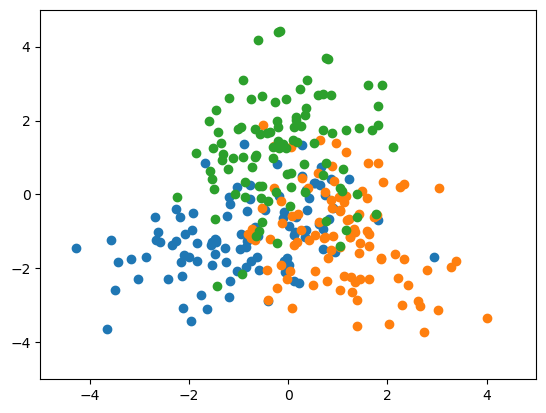

In [12]:
mu_a = np.array([-1,-1])
sigma_a = np.array([[2,0.5],[0.5,1]])
mu_b = np.array([1,-1])
sigma_b = np.array([[1,-0.5],[-0.5,2]])
mu_c = np.array([0,1])
sigma_c = np.array([[1,0],[0,2]])
x1,y1 = np.random.multivariate_normal(mu_a,sigma_a, (1,100)).T
x2,y2 = np.random.multivariate_normal(mu_b,sigma_b, (1,100)).T
x3,y3 = np.random.multivariate_normal(mu_c,sigma_c, (1,100)).T
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.axis([-5,5,-5,5])
plt.savefig('GaussianMixturePlot.pdf')

In [442]:
#will need to define some sigma
# sigmas = [0.5,1,2,4,8]
# HERE WE GENERATE DATASET FOR SIGMA = 1/2
sigma = 0.5
x1, y1 = np.random.multivariate_normal(mu_a,sigma*sigma_a, (1,100)).T
x2, y2 = np.random.multivariate_normal(mu_b,sigma*sigma_b, (1,100)).T
x3, y3 = np.random.multivariate_normal(mu_c,sigma*sigma_c, (1,100)).T
xpoints = np.concatenate((x1,x2,x3), axis=0)
ypoints = np.concatenate((y1,y2,y3), axis=0)


In [443]:
# HERE WE TRAIN THE DATASET FOR SIGMA = 1/2
points = []
for i in range(len(xpoints)):
    points.append([xpoints[i][0],ypoints[i][0]])
points_array = np.array(points)
kmeans = KMeans(n_clusters=3, n_init = "auto").fit(points)
# points_array.shape
#now we need to evalute the objective and accuracy
# len(points)
# points
# kmeans.labels_

In [444]:
gm = GaussianMixture(n_components=3).fit(points)
# gm.predict(points)
# gm.means_

In [445]:
def MatchLabels(KmCC, orig_clus):
    # KmCC stands for KmeansClusterCenters, orig_clus stands for OriginalClusters
    new_cluster_labels = []
    for clus in orig_clus:
        diff = []
        for new_clus in KmCC:
            array1 = new_clus - clus
            diff.append(np.abs(array1[0]) + np.abs(array1[1]))
        new_cluster_labels.append(diff.index(min(diff)))
    return new_cluster_labels

In [446]:
def GetAccuracy(km_cc, orig_cc, kml):
    # km_cc = kmeans.cluster_centers_ , orig_cc = [mu_a,mu_b,mu_c], kml = kmeans.labels_
    NCL = MatchLabels(km_cc, orig_cc)
    PredictedLabels = [NCL[0]]*100 + [NCL[1]]*100 + [NCL[2]]*100
    correct_count = 0
    for i in range(300):
        if PredictedLabels[i] == kml[i]:
            correct_count += 1
    return 'Accuracy =', (correct_count)/300

In [447]:
def Objective(km_cc, kml, data):
    # km_cc = kmeans.cluster_centers_ , orig_cc = [mu_a,mu_b,mu_c], kml = kmeans.labels_, 
#     NCL = MatchLabels(km_cc, orig_cc)
#     PredictionLabels = [NCL[0]]*100 + [NCL[1]]*100 + [NCL[2]]*100
    Objective = 0
    for i in range(300):
        Objective = Objective + (LA.norm( data[i] - km_cc[kml[i]] ))**2
    
    return 'Objective = ', Objective

In [453]:
Objective(kmeans.cluster_centers_, kmeans.labels_, points)


('Objective = ', 301.85026854000193)

In [454]:
Objective(gm.means_, gm.predict(points), points)

('Objective = ', 309.2728975006199)

In [449]:
# THIS IS THE RESULT FOR SIGMA = 1/2 KMEANS ACCURACY
GetAccuracy(kmeans.cluster_centers_, [mu_a,mu_b,mu_c], kmeans.labels_)
#kmeans.labels_

('Accuracy =', 0.8533333333333334)

In [450]:
# THIS IS THE RESULT FOR SIGMA = 1/2 GAUSSIAN ACCURACY
GetAccuracy(gm.means_,[mu_a,mu_b,mu_c], gm.predict(points))

('Accuracy =', 0.8533333333333334)

In [460]:
# HERE WE GET GENERATE THE DATASET FOR SIGMA = 1
sigma = 1
mu_a = np.array([-1,-1])
mu_b = np.array([1,-1])
mu_c = np.array([0,1])
x1, y1 = np.random.multivariate_normal(mu_a,sigma*sigma_a, (1,100)).T
x2, y2 = np.random.multivariate_normal(mu_b,sigma*sigma_b, (1,100)).T
x3, y3 = np.random.multivariate_normal(mu_c,sigma*sigma_c, (1,100)).T
xpoints = np.concatenate((x1,x2,x3), axis=0)
ypoints = np.concatenate((y1,y2,y3), axis=0)

In [461]:
# HERE WE TRAIN THE DATASET FOR SIGMA = 1
points = []
for i in range(len(xpoints)):
    points.append([xpoints[i][0],ypoints[i][0]])
points_array = np.array(points)
kmeans = KMeans(n_clusters=3, n_init = "auto").fit(points)

In [462]:
gm = GaussianMixture(n_components=3).fit(points)

In [467]:
Objective(kmeans.cluster_centers_, kmeans.labels_, points)


('Objective = ', 545.4805511108461)

In [468]:
Objective(gm.means_, gm.predict(points), points)

('Objective = ', 569.5977475617335)

In [465]:
# THIS IS THE RESULT FOR SIGMA = 1 KMEANS ACCURACY
GetAccuracy(kmeans.cluster_centers_, [mu_a,mu_b,mu_c], kmeans.labels_)

('Accuracy =', 0.7366666666666667)

In [466]:
# THIS IS THE RESULT FOR SIGMA = 1 GAUSSIAN ACCURACY
GetAccuracy(gm.means_,[mu_a,mu_b,mu_c], gm.predict(points))

('Accuracy =', 0.7366666666666667)

In [469]:
# HERE WE GET GENERATE THE DATASET FOR SIGMA = 2
sigma = 2
mu_a = np.array([-1,-1])
mu_b = np.array([1,-1])
mu_c = np.array([0,1])
x1, y1 = np.random.multivariate_normal(mu_a,sigma*sigma_a, (1,100)).T
x2, y2 = np.random.multivariate_normal(mu_b,sigma*sigma_b, (1,100)).T
x3, y3 = np.random.multivariate_normal(mu_c,sigma*sigma_c, (1,100)).T
xpoints = np.concatenate((x1,x2,x3), axis=0)
ypoints = np.concatenate((y1,y2,y3), axis=0)

In [470]:
# HERE WE TRAIN THE DATASET FOR SIGMA = 2
points = []
for i in range(len(xpoints)):
    points.append([xpoints[i][0],ypoints[i][0]])
points_array = np.array(points)
kmeans = KMeans(n_clusters=3, n_init = "auto").fit(points)

In [471]:
gm = GaussianMixture(n_components=3).fit(points)

In [472]:
Objective(kmeans.cluster_centers_, kmeans.labels_, points)


('Objective = ', 959.5780093332802)

In [473]:
Objective(gm.means_, gm.predict(points), points)

('Objective = ', 1079.2674631771936)

In [392]:
# THIS IS THE RESULT FOR SIGMA=2 KMEANS ACCURACY
GetAccuracy(kmeans.cluster_centers_, [mu_a,mu_b,mu_c], kmeans.labels_)

('Accuracy =', 0.61)

In [393]:
# THIS IS THE RESULT FOR SIGMA=2 GAUSSIAN ACCURACY
GetAccuracy(gm.means_,[mu_a,mu_b,mu_c], gm.predict(points))

('Accuracy =', 0.5766666666666667)

In [514]:
# HERE WE GET GENERATE THE DATASET FOR SIGMA = 4
sigma = 4
mu_a = np.array([-1,-1])
mu_b = np.array([1,-1])
mu_c = np.array([0,1])
x1, y1 = np.random.multivariate_normal(mu_a,sigma*sigma_a, (1,100)).T
x2, y2 = np.random.multivariate_normal(mu_b,sigma*sigma_b, (1,100)).T
x3, y3 = np.random.multivariate_normal(mu_c,sigma*sigma_c, (1,100)).T
xpoints = np.concatenate((x1,x2,x3), axis=0)
ypoints = np.concatenate((y1,y2,y3), axis=0)

In [515]:
# HERE WE TRAIN THE DATASET FOR SIGMA = 4
points = []
for i in range(len(xpoints)):
    points.append([xpoints[i][0],ypoints[i][0]])
points_array = np.array(points)
kmeans = KMeans(n_clusters=3, n_init = "auto").fit(points)

In [516]:
gm = GaussianMixture(n_components=3).fit(points)

In [517]:
Objective(kmeans.cluster_centers_, kmeans.labels_, points)


('Objective = ', 1727.801161307014)

In [518]:
Objective(gm.means_, gm.predict(points), points)

('Objective = ', 2062.2074663356457)

In [519]:
# THIS IS THE RESULT FOR SIGMA=4 KMEANS ACCURACY
GetAccuracy(kmeans.cluster_centers_, [mu_a,mu_b,mu_c], kmeans.labels_)

('Accuracy =', 0.5633333333333334)

In [501]:
# THIS IS THE RESULT FOR SIGMA=4 GAUSSIAN ACCURACY
GetAccuracy(gm.means_,[mu_a,mu_b,mu_c], gm.predict(points))

('Accuracy =', 0.5733333333333334)

In [479]:
# HERE WE GET GENERATE THE DATASET FOR SIGMA = 8
sigma = 8
mu_a = np.array([-1,-1])
mu_b = np.array([1,-1])
mu_c = np.array([0,1])
x1, y1 = np.random.multivariate_normal(mu_a,sigma*sigma_a, (1,100)).T
x2, y2 = np.random.multivariate_normal(mu_b,sigma*sigma_b, (1,100)).T
x3, y3 = np.random.multivariate_normal(mu_c,sigma*sigma_c, (1,100)).T
xpoints = np.concatenate((x1,x2,x3), axis=0)
ypoints = np.concatenate((y1,y2,y3), axis=0)

In [480]:
# HERE WE TRAIN THE DATASET FOR SIGMA = 8
points = []
for i in range(len(xpoints)):
    points.append([xpoints[i][0],ypoints[i][0]])
points_array = np.array(points)
kmeans = KMeans(n_clusters=3, n_init = "auto").fit(points)

In [481]:
gm = GaussianMixture(n_components=3).fit(points)

In [482]:
Objective(kmeans.cluster_centers_, kmeans.labels_, points)


('Objective = ', 3473.5886029502717)

In [483]:
Objective(gm.means_, gm.predict(points), points)

('Objective = ', 3935.1054305302478)

In [417]:
# THIS IS THE RESULT FOR SIGMA=8 KMEANS ACCURACY
GetAccuracy(kmeans.cluster_centers_, [mu_a,mu_b,mu_c], kmeans.labels_)

('Accuracy =', 0.48333333333333334)

In [418]:
# THIS IS THE RESULT FOR SIGMA=8 GAUSSIAN ACCURACY
GetAccuracy(gm.means_,[mu_a,mu_b,mu_c], gm.predict(points))

('Accuracy =', 0.45666666666666667)

In [ ]:
# HERE WE HAVE THE KMEANS ACCURACIES
# We have the following accuracies [0.82, 0.7133333333333334, 0.61, 0.5466666666666666, 0.48333333333333334]
# for the sigmas = [.5,1,2,4,8]

In [ ]:
# HERE WE HAVE THE KMEANS OBJECTIVES
# [301.85026854000193, 523.9412226464449, 959.5780093332802, 1811.1432568179032, 3473.5886029502717]

In [ ]:
# HERE WE HAVE THE GAUSSIAN ACCURACIES
# [0.8066666666666666, 0.69, 0.5766666666666667, 0.52, 0.45666666666666667]
# for the sigmas = [.5,1,2,4,8]

In [ ]:
# HERE WE HAVE THE GAUSSIAN OBJECTIVES
#[309.2728975006199, 572.6590108941693, 1079.2674631771936, 2843.7988963630746, 3935.1054305302478]

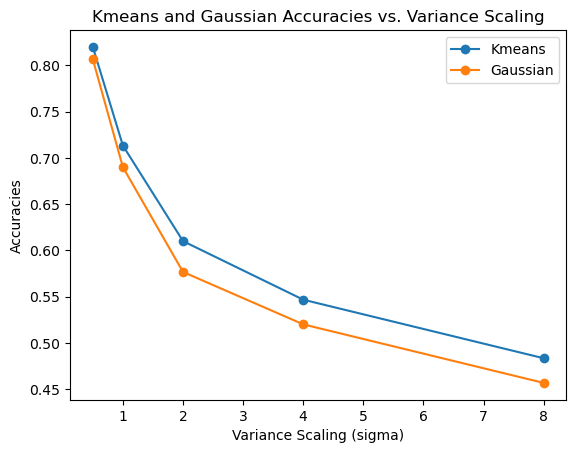

In [492]:
sigmas = [.5,1,2,4,8]
KmeansAccuracies = [0.82, 0.7133333333333334, 0.61, 0.5466666666666666, 0.48333333333333334]
GaussianAccuracies = [0.8066666666666666, 0.69, 0.5766666666666667, 0.52, 0.45666666666666667]
plt.plot(sigmas, KmeansAccuracies, marker = 'o', label='Kmeans')
plt.plot(sigmas, GaussianAccuracies, marker = 'o', label = 'Gaussian')
plt.title('Kmeans and Gaussian Accuracies vs. Variance Scaling')
plt.xlabel('Variance Scaling (sigma)')
plt.ylabel('Accuracies')
plt.legend()
plt.savefig('KmeansGaussianPlot.pdf')

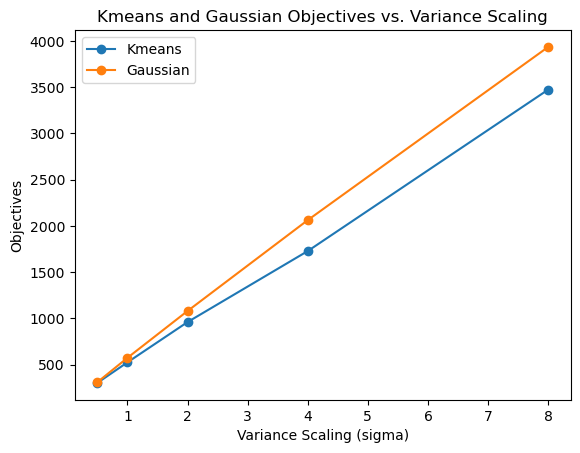

In [521]:
sigmas = [.5,1,2,4,8]
KmeansObjectives = [301.85026854000193, 523.9412226464449, 959.5780093332802, 
                   1727.801161307014, 3473.5886029502717]
GaussianObjectives = [309.2728975006199, 572.6590108941693, 1079.2674631771936, 
                     2062.2074663356457, 3935.1054305302478]
plt.plot(sigmas, KmeansObjectives, marker = 'o', label = 'Kmeans')
plt.plot(sigmas, GaussianObjectives, marker = 'o', label = 'Gaussian')
plt.title('Kmeans and Gaussian Objectives vs. Variance Scaling')
plt.xlabel('Variance Scaling (sigma)')
plt.ylabel('Objectives')
plt.legend()
plt.savefig('KmeansGaussianObjectives.pdf')